In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from CorrectFeatures import correct_SCT_data, correct_SCT_labels, correct_US_data, correct_US_labels
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer


In [30]:
def plot_learning_curve(
        estimator,
        title,
        X,
        y,
        axes=None,
        ylim=None,
        cv=None,
        n_jobs=None,
        train_sizes=np.linspace(0.1, 1.0, 5),
        exploit_incremental_learning = False
):
    if axes is None:
        _, axes = plt.subplots(figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Error")
    # print(y)
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="neg_mean_absolute_error",
        exploit_incremental_learning = exploit_incremental_learning
    )
    train_scores = -train_scores
    test_scores = -test_scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training Error"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation Error"
    )
    axes.legend(loc="best")

    return plt, train_scores, test_scores


# fig, axes = plt.subplots(3, 2, figsize=(10, 15))
#
# X, y = load_digits(return_X_y=True)
#
# title = "Learning Curves (Naive Bayes)"
# # Cross validation with 50 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
#
# estimator = GaussianNB()
# plot_learning_curve(
#     estimator, title, X, y, axes=axes[0, 0], cv=cv, n_jobs=4
# )
#
# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(
#     estimator, title, X, y, axes=axes[0, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )
#
# plt.show()

In [9]:
DEBUG = False

In [13]:
training_data_SCT = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_training.csv"))
training_labels_SCT = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_training.csv"))

In [14]:
training_data_US = correct_US_data(pd.read_csv("Data/US/US_data_training.csv"))
training_labels_US = correct_US_labels(pd.read_csv("Data/US/US_labels_training.csv"))

In [15]:
if DEBUG:
    training_data_SCT = training_data_SCT[:20]
    training_labels_SCT = training_labels_SCT[:20]
    training_data_US = training_data_US[:20]
    training_labels_US = training_labels_US[:20]

In [16]:
# fig, axes = plt.subplots(2, 3, figsize=(20, 15))
# title = "Learning Curves United States Models"

# plot_learning_curve(
#     model_hours_forest_lc, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )

In [17]:
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 400
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 14}
#
# plt.rcParams.update({'font.size': 14})

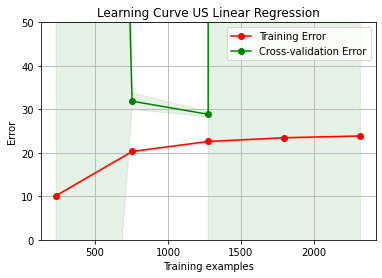

In [38]:
model_hours_linear_lc_US_fig, axes = plt.subplots(1, 1) #, figsize=(4, 2.5))
model_hours_linear_lc_US = LinearRegression()
plot, train, test = plot_learning_curve(
    model_hours_linear_lc_US, "Learning Curve US Linear Regression", training_data_US, training_labels_US,
    ylim=(0.0, 50.0),
    axes=axes, n_jobs=8
)
model_hours_linear_lc_US_fig.savefig("graphs/Learning_Curve_US_Linear_Regression.png", dpi = 400)

In [32]:
# fig, axes = plt.subplots(1, 1)
# model_hours_linear_lc_SCT = LinearRegression()
#
# plot_learning_curve(
#     model_hours_linear_lc_SCT, "Learning Curve Scotland Linear Regression", training_data_SCT, training_labels_SCT, axes=axes, n_jobs=2
# )

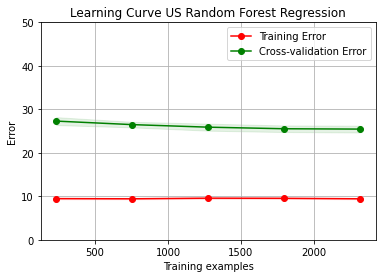

In [33]:
model_hours_forest_lc_US_fig, axes = plt.subplots(1, 1)
model_hours_forest_lc_US = RandomForestRegressor(n_estimators=100)

plot_learning_curve(
    model_hours_forest_lc_US, "Learning Curve US Random Forest Regression", training_data_US, training_labels_US, axes=axes, n_jobs=8,
    ylim=(0.0, 50.0),
)
model_hours_forest_lc_US_fig.savefig("graphs/Learning_Curve_US_Random_Forest_Regression.png",dpi=400)

In [34]:
# fig, axes = plt.subplots(1, 1)
# model_hours_forest_lc_SCT = RandomForestRegressor(n_estimators=100, n_jobs=2)
# # plot_learning_curve(
# #     model_hours_forest_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,1], n_jobs=2
# # )
# plot_learning_curve(
#     model_hours_forest_lc_SCT, "Learning Curve Scotland Random Forest Regression", training_data_SCT, training_labels_SCT, axes=axes, n_jobs=2
# )

(<module 'matplotlib.pyplot' from 'C:\\Users\\wills\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 array([[99.69399619, 96.20460266, 94.85038411, 96.24308276, 96.19950628],
        [67.57049985, 64.96077077, 65.9184742 , 65.82454581, 66.42750729],
        [40.1361195 , 38.94873462, 40.51592681, 40.31031325, 40.54659594],
        [35.11866258, 33.76132039, 34.72711376, 34.5489549 , 34.73935344],
        [34.07178087, 33.10297299, 33.82124976, 33.58286578, 33.74749048]]),
 array([[95.9116723 , 99.30227908, 94.07969448, 96.09135864, 98.7684718 ],
        [65.41487916, 68.69761513, 63.8889967 , 64.66339188, 68.23021084],
        [37.75567049, 42.80832667, 38.24695556, 39.54954678, 42.1600722 ],
        [32.99143029, 37.45458406, 33.62900511, 34.67894083, 35.64829057],
        [32.06719184, 35.938506  , 33.04924705, 34.00230528, 33.33858805]]))

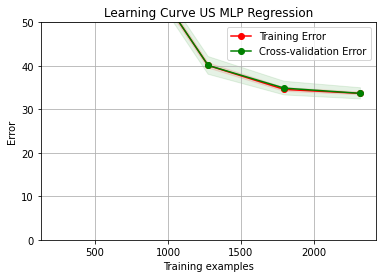

In [35]:
model_hours_MLP_lc_US_fig, axes = plt.subplots(1, 1)
model_hours_MLP_lc_US = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100,),activation="tanh")
# plot_learning_curve(
#     model_hours_MLP_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,2], n_jobs=2
# )
plot_learning_curve(
    model_hours_MLP_lc_US, "Learning Curve US MLP Regression", training_data_US, training_labels_US, axes=axes, n_jobs=8,
    ylim=(0.0, 50.0),
    #exploit_incremental_learning=True
)
model_hours_MLP_lc_US_fig.savefig("graphs/Learning_Curve_US_MLP_Regression.png", dpi=400)

In [37]:
model_hours_linear_lc_US_fig.savefig("graphs/Learning_Curve_US_Linear_Regression.png", dpi = 400)
model_hours_forest_lc_US_fig.savefig("graphs/Learning_Curve_US_Random_Forest_Regression.png",dpi=400)
model_hours_MLP_lc_US_fig.savefig("graphs/Learning_Curve_US_MLP_Regression.png", dpi=400)

In [23]:
# fig, axes = plt.subplots(1, 1)
# model_hours_MLP_lc_SCT = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100,),activation="tanh")
# # plot_learning_curve(
# #     model_hours_MLP_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,2], n_jobs=2
# # )
# plot_learning_curve(
#     model_hours_MLP_lc_SCT, "Learning Curve Scotland MLP Regression", training_data_SCT, training_labels_SCT, axes=axes, n_jobs=2
# )
# fig

In [43]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 400
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 30}
#
# plt.rcParams.update({'font.size': 30})
# fig.set_size_inches(16, 10)
# fig